## Exploratory Data Analysis

### 1. Analysis
1. Univariate Analysis
2. Multivariate Analysis

### 2. Feature Engineering
1. Creating new columns
2. Modifying existing ones

### 3. Handling Outliers
1. Detect Outliers
2. Remove Outliers

## The entire process is highly iterative

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(6, 4)})

In [3]:
# Importing the dataset
df=pd.read_csv('train.csv')

In [4]:
# Shape
df.shape

(891, 12)

In [5]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Categorical Columns

- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked

## Numerical Columns

- Age 
- Fare
- PassengerId

## Mixed Columns

- Name
- Ticket
- Cabin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [10]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [11]:
# Imputing missing values for age
# Strategy - mean

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'] = df['Embarked'].fillna('S')

In [13]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [14]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Changing data type for the following cols

- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [15]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [17]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62 people died in the accident


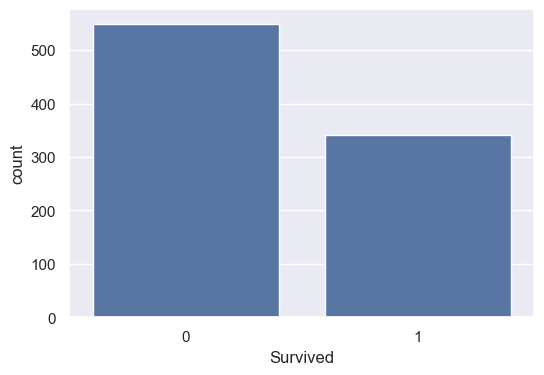

In [18]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(x = df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<AxesSubplot: xlabel='Pclass', ylabel='count'>

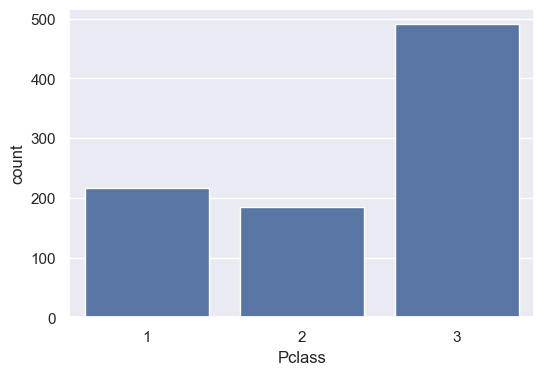

In [19]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(x=df['Pclass'])

# Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<AxesSubplot: xlabel='Sex', ylabel='count'>

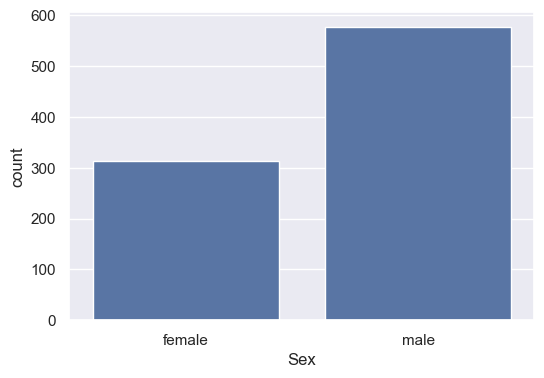

In [20]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(x = df['Sex'])

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<AxesSubplot: xlabel='SibSp', ylabel='count'>

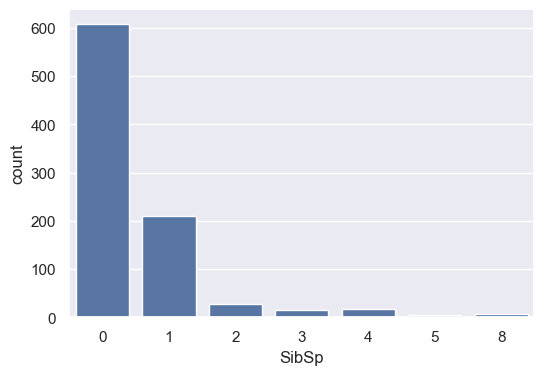

In [21]:
print(df['SibSp'].value_counts())

sns.countplot(x=df['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<AxesSubplot: xlabel='Parch', ylabel='count'>

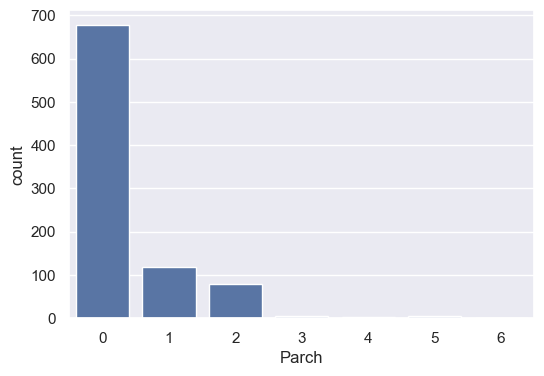

In [22]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(x = df['Parch'])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<AxesSubplot: xlabel='Embarked', ylabel='count'>

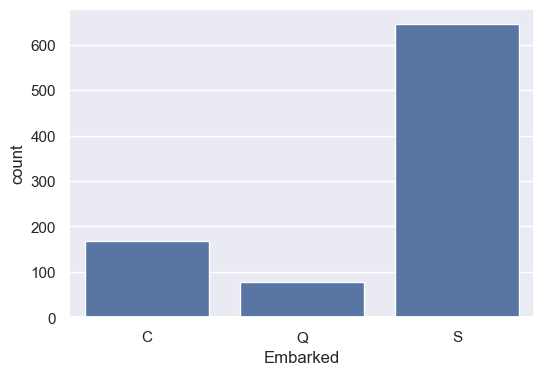

In [23]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x=df['Embarked'])

0.45956263424701577
0.9865867453652877


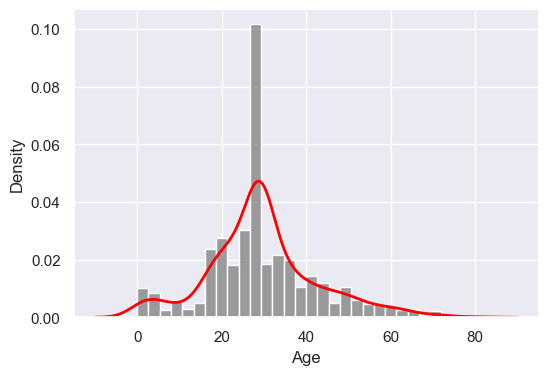

In [24]:
# Age column

sns.histplot(df['Age'], bins=30, color='gray', stat='density')
sns.kdeplot(df['Age'], color='red', linewidth=2)

print(df['Age'].skew())

print(df['Age'].kurt())


<AxesSubplot: ylabel='Age'>

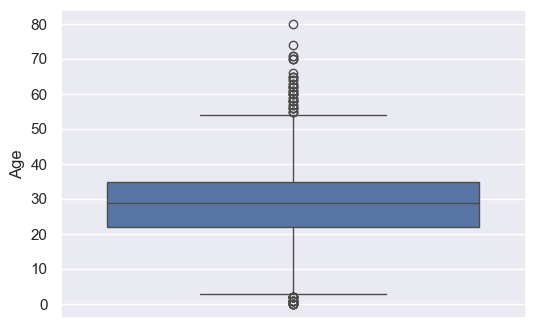

In [25]:
sns.boxplot(df['Age'])

In [26]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


## Conclusion

- For all practical purposes age can be cosidered as normal distribution
- Deeper analysis is required for outlier detection

<AxesSubplot: xlabel='Fare', ylabel='Density'>

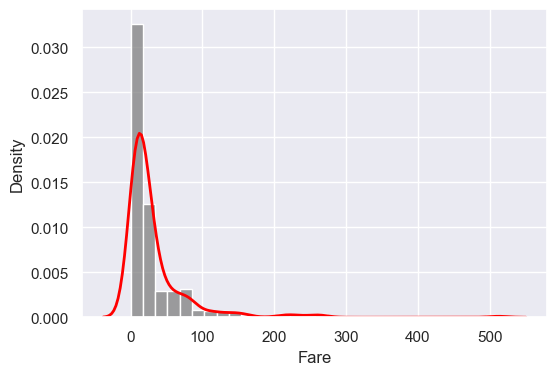

In [27]:
# Fare column

sns.histplot(df['Fare'], bins=30, color='gray', stat='density')
sns.kdeplot(df['Fare'], color='red', linewidth=2)

In [28]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<AxesSubplot: ylabel='Fare'>

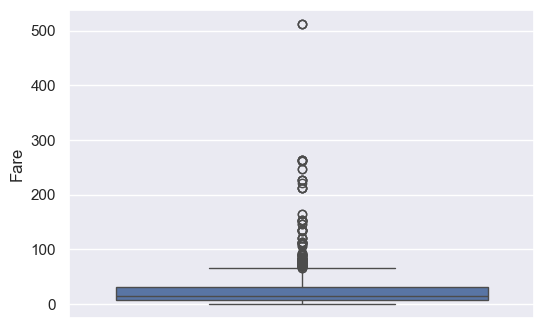

In [29]:
sns.boxplot(df['Fare'])

In [30]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


## Conclusion

- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


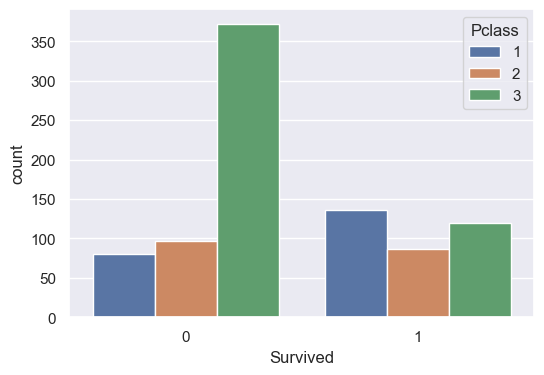

In [31]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(x=df['Survived'], hue=df['Pclass'])

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


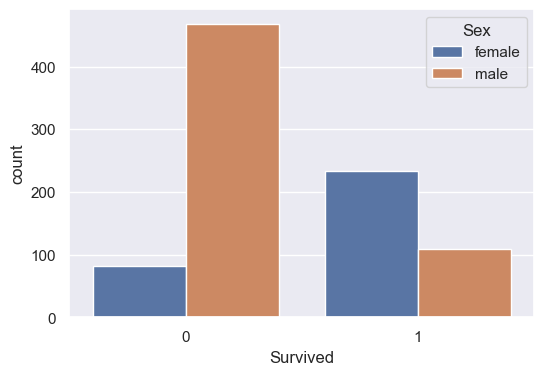

In [32]:
# Survival with Sex

sns.countplot(x=df['Survived'], hue=df['Sex'])

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


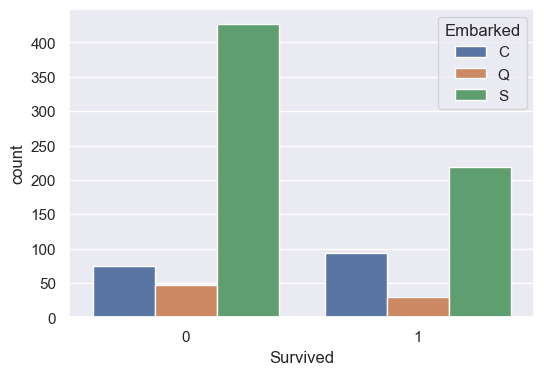

In [33]:
# Survival with Embarked

sns.countplot(x=df['Survived'], hue=df['Embarked'])

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

<AxesSubplot: xlabel='Age', ylabel='Density'>

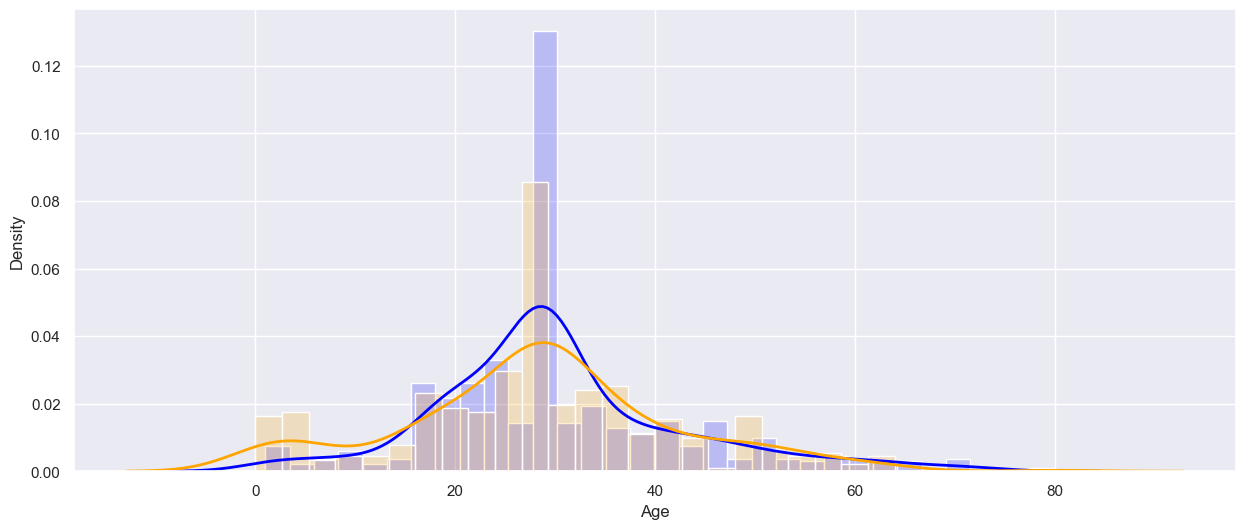

In [34]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.histplot(df[df['Survived']==0]['Age'], bins=30, color='blue', alpha=0.2, stat='density')
sns.kdeplot(df[df['Survived']==0]['Age'], color='blue', linewidth=2)

sns.histplot(df[df['Survived']==1]['Age'], bins=30, color='orange', alpha=0.2, stat='density')
sns.kdeplot(df[df['Survived']==1]['Age'], color='orange', linewidth=2)

<AxesSubplot: xlabel='Fare', ylabel='Density'>

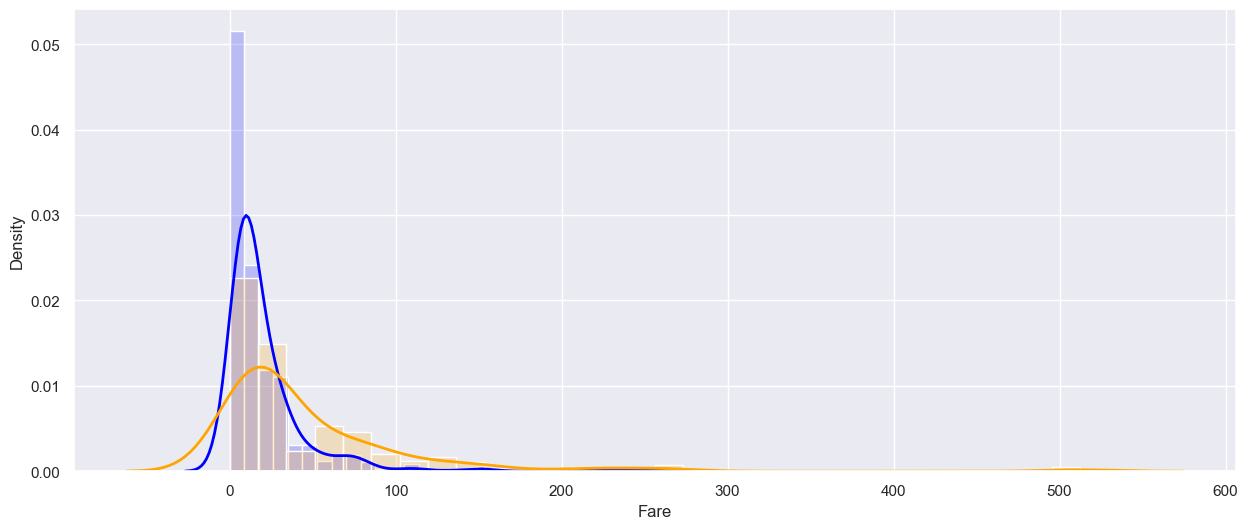

In [35]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.histplot(df[df['Survived']==0]['Fare'], bins=30, color='blue', alpha=0.2, stat='density')
sns.kdeplot(df[df['Survived']==0]['Fare'], color='blue', linewidth=2)

sns.histplot(df[df['Survived']==1]['Fare'], bins=30, color='orange', alpha=0.2, stat='density')
sns.kdeplot(df[df['Survived']==1]['Fare'], color='orange', linewidth=2)


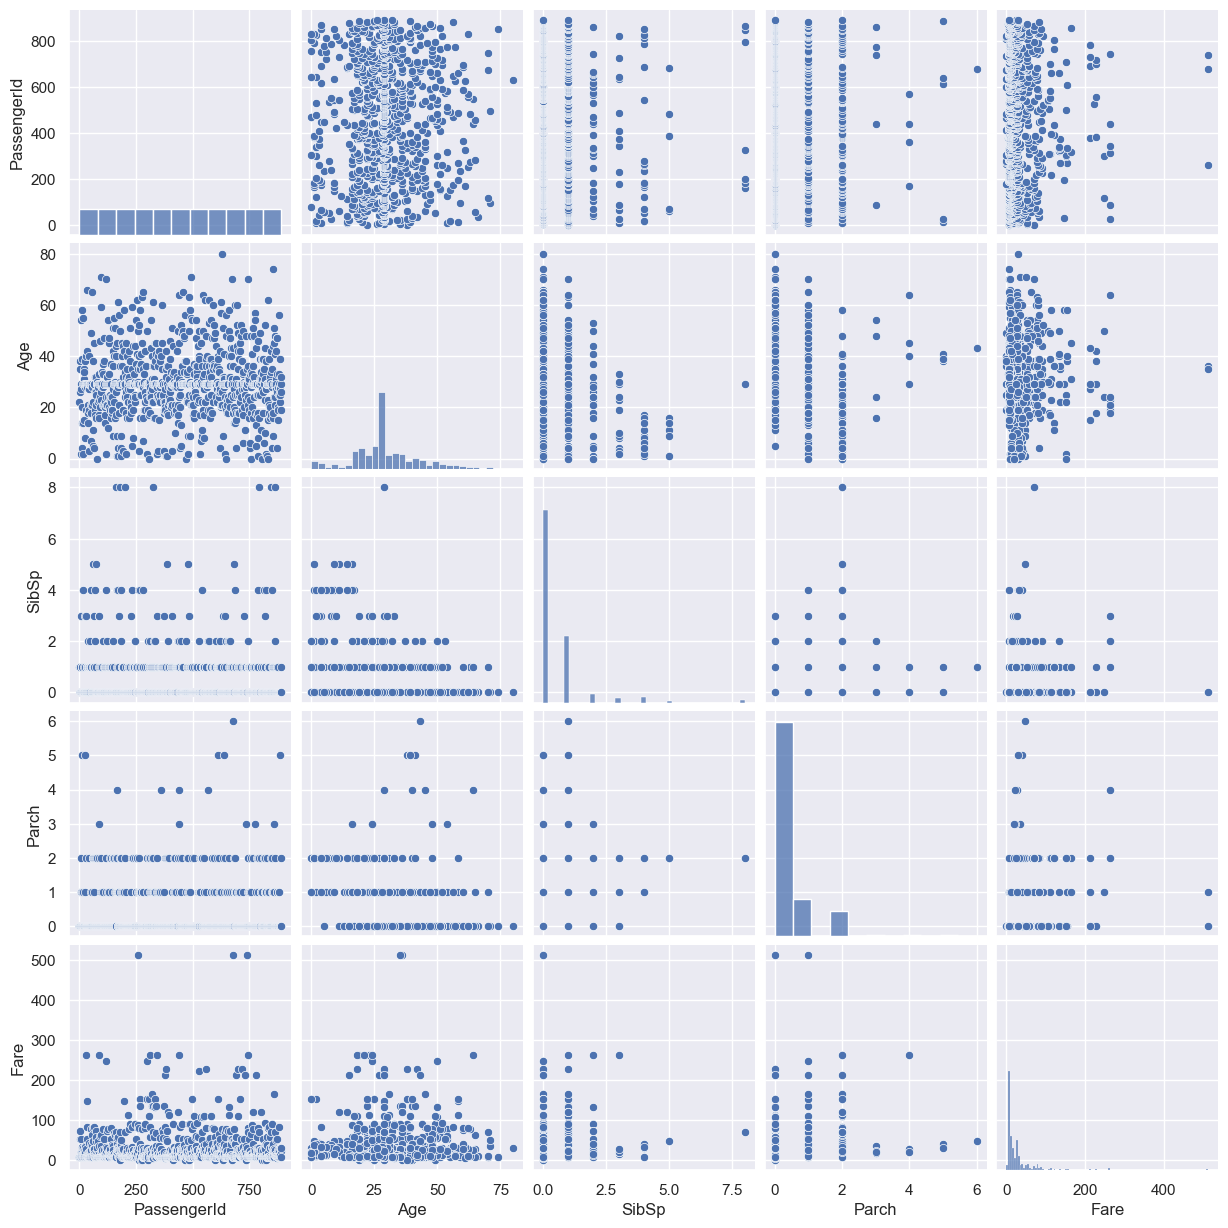

In [36]:
sns.pairplot(df)

<AxesSubplot: >

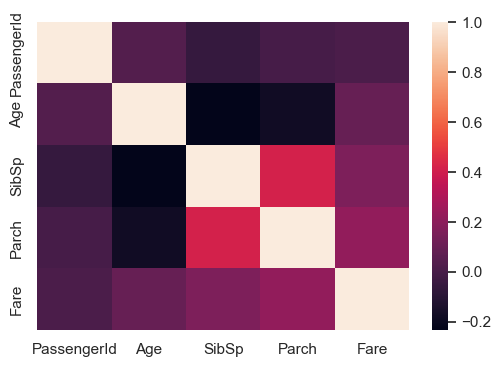

In [37]:
sns.heatmap(df.select_dtypes(include='number').corr())

In [38]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [39]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42,1,0,113789,52.0000,S,1
124,125,0,1,"White, Mr. Percival Wayland",male,54,0,1,35281,77.2875,S,1
107,108,1,3,"Moss, Mr. Albert Johan",male,29,0,0,312991,7.7750,S,0
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,S,0
611,612,0,3,"Jardin, Mr. Jose Neto",male,29,0,0,SOTON/O.Q. 3101305,7.0500,S,0


In [40]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [41]:
df['family_type']=df['family_size'].apply(family_type)

In [42]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
130,131,0,3,"Drazenoic, Mr. Jozef",male,33,0,0,349241,7.8958,C,0,Alone
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29,0,0,330959,7.8792,Q,0,Alone
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54,1,0,244252,26.0000,S,1,Medium
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24,0,0,PC 17482,49.5042,C,0,Alone
530,531,1,2,"Quick, Miss. Phyllis May",female,2,1,1,26360,26.0000,S,2,Medium


In [43]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [44]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
762,763,1,3,"Barah, Mr. Hanna Assi",male,20,2663,7.2292,C,Alone
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38,19943,90.0000,S,Medium
389,390,1,2,"Lehmann, Miss. Bertha",female,17,SC 1748,12.0000,C,Alone
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26,347470,7.8542,S,Alone
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35,PC 17475,26.2875,S,Alone


In [45]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


## Detecting outliers

### Numerical Data
- if the data is following normal distribution, anything beyond   3*SD - mean + 3*SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

### Categorical data
- If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [46]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [47]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [48]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [49]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

<AxesSubplot: >

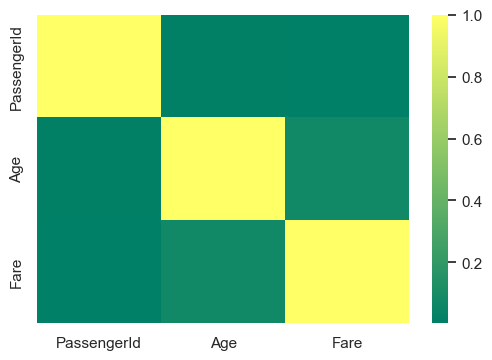

In [50]:
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='summer')

## Drawing Conclusions

- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone